# Classificador GUI para cães x gatos

In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Settings Setup

In [62]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [4]:
filenames=os.listdir("D:\\SiDi\\Project\\Modulo II\\dataset\\512")

In [9]:
filenames[0]

'768097929659817984-2.jpg'

In [93]:
path = "D:/SiDi/Project/Modulo II/dataset/dataset_sidi_512.csv"
df512 = pd.read_csv(path, sep='\t')
df512[df512["sent_text"] == "POS"].head(1000)

,Unnamed: 0,Unnamed: 0.1,image_name,NEG,NEU,POS,text,sent_text,sent_image,image_path,image_height,image_width
4000,191962,191962,781636404799541248-1,0.049034,0.074031,0.876935,"Ah, Williamsburg! This is where my new protago...",POS,2,data/78163/781636404799541248-1.jpg,991,991
4001,261866,261866,783159977338736640-1,0.013936,0.054167,0.931898,Keystagram: Umm superfreak sounds good like me...,POS,2,data/78315/783159977338736640-1.jpg,936,750
4002,257389,257389,783084337252143106-4,0.010779,0.036041,0.953180,I love me some Troy #nationalboyfriendday http...,POS,2,data/78308/783084337252143106-4.jpg,960,1280
4003,228195,228195,782352812877443072-2,0.008148,0.016147,0.975705,Sweet dreams baby @iamsrk ❤I will take U 🌸&amp...,POS,2,data/78235/782352812877443072-2.jpg,1024,1024
4004,189062,189062,781583334250016769-1,0.008259,0.132701,0.859040,I vote for @HananeElKhader for the 100 most be...,POS,2,data/78158/781583334250016769-1.jpg,697,697
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,301419,301419,784005683255578624-1,0.021516,0.110939,0.867544,Happy Thursday https://t.co/2rR9JrEhFr,POS,2,data/78400/784005683255578624-1.jpg,705,705
4996,48982,48982,769273697949671424-1,0.005499,0.064212,0.930289,cutie #Westie #handmade keyring for the #dog l...,POS,2,data/76927/769273697949671424-1.jpg,700,700
4997,89904,89904,769468338837663745-1,0.017371,0.081997,0.900632,RT @LQ_TFC_Global: #GrazieMilleDolceAmore JUST...,POS,2,data/76946/769468338837663745-1.jpg,720,720
4998,81817,81817,769422558009491456-2,0.009974,0.034887,0.955139,RT @axlrose995: GMHave a good and blessed Satu...,POS,2,data/76942/769422558009491456-2.jpg,720,960


In [7]:
categories=[]
"""for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)"""



In [ ]:
categories =+ df["image_name"] for f_name in filenames[:1000]:

In [ ]:
(df512["image_name"].values.split('.')[0] == filenames[0:1200]).any(axis=0)

In [39]:
df512['image_name'].isin(filenames_new).value_counts()
filenames = df512['image_name'].apply(lambda x:  f"{x}.jpg")
filenames[0:5]

0    798338609870872577-2.jpg
1    802556641057054721-1.jpg
2    796032212407721984-1.jpg
3    798011160532381696-1.jpg
4    801181521679790080-1.jpg
Name: image_name, dtype: object

In [41]:
categories = df512['sent_image']
categories.head()

0    0
1    0
2    0
3    0
4    0
Name: sent_image, dtype: int64

In [42]:
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})
df.head()

,filename,category
0,798338609870872577-2.jpg,0
1,802556641057054721-1.jpg,0
2,796032212407721984-1.jpg,0
3,798011160532381696-1.jpg,0
4,801181521679790080-1.jpg,0


# Build Network Architecture

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

In [75]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [76]:
df["category"] = df["category"].replace({0:'NEG', 1:'NEU', 2:'POS'})
df["category"].value_counts()

NEG    4000
POS    4000
NEU    4000
Name: category, dtype: int64

In [77]:
train_df,validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [78]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
                                  )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    "D:\\SiDi\\Project\\Modulo II\\dataset\\512",
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D:\\SiDi\\Project\\Modulo II\\dataset\\512", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)


Found 9600 validated image filenames belonging to 3 classes.
Found 2400 validated image filenames belonging to 3 classes.


In [79]:
import scipy

In [94]:
epochs=100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/100
640/640 [==============================] - 138s 216ms/step - loss: 1.0851 - accuracy: 0.3969 - val_loss: 1.0704 - val_accuracy: 0.4050 - lr: 1.2500e-04
Epoch 2/100
640/640 [==============================] - 148s 231ms/step - loss: 1.0872 - accuracy: 0.4031 - val_loss: 1.0692 - val_accuracy: 0.4058 - lr: 1.2500e-04
Epoch 3/100
640/640 [==============================] - 148s 231ms/step - loss: 1.0850 - accuracy: 0.3914 - val_loss: 1.0822 - val_accuracy: 0.4004 - lr: 1.2500e-04
Epoch 4/100
640/640 [==============================] - 150s 234ms/step - loss: 1.0804 - accuracy: 0.4067 - val_loss: 1.0696 - val_accuracy: 0.4075 - lr: 1.2500e-04
Epoch 5/100
640/640 [==============================] - 141s 221ms/step - loss: 1.0829 - accuracy: 0.4002 - val_loss: 1.0694 - val_accuracy: 0.4196 - lr: 1.2500e-04
Epoch 6/100
640/640 [==============================] - 157s 245ms/step - loss: 1.0802 - accuracy: 0.4053 - val_loss: 1.0743 - val_accuracy: 0.4196 - lr: 1.2500e-04
Epoch 7/100
640/

In [95]:
import datetime
today = datetime.datetime.now()
utc_date_time = today.strftime("%Y-%m-%dT%H-%M-%SZ")
utc_date_time

'2022-01-23T20-33-11Z'

In [96]:
model.save(f'{utc_date_time}_image_sent_model_v1.h5')

In [97]:
test_filenames = os.listdir("D:\\SiDi\\Project\\Modulo II\\dataset\\512\\test")

test_df = pd.DataFrame({
    'filename': test_filenames
})

In [98]:
test_generator = train_datagen.flow_from_dataframe(test_df,
                                                   'D:\\SiDi\\Project\\Modulo II\\dataset\\512\\test',
                                                   x_col='filename',
                                                   y_col=None,
                                                   target_size=Image_Size,
                                                   class_mode=None,
                                                   batch_size=batch_size
                                                   )

nb_samples = test_df.shape[0]

Found 994 validated image filenames.


In [99]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [100]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({0:'NEG', 1:'NEU', 2:'POS'})

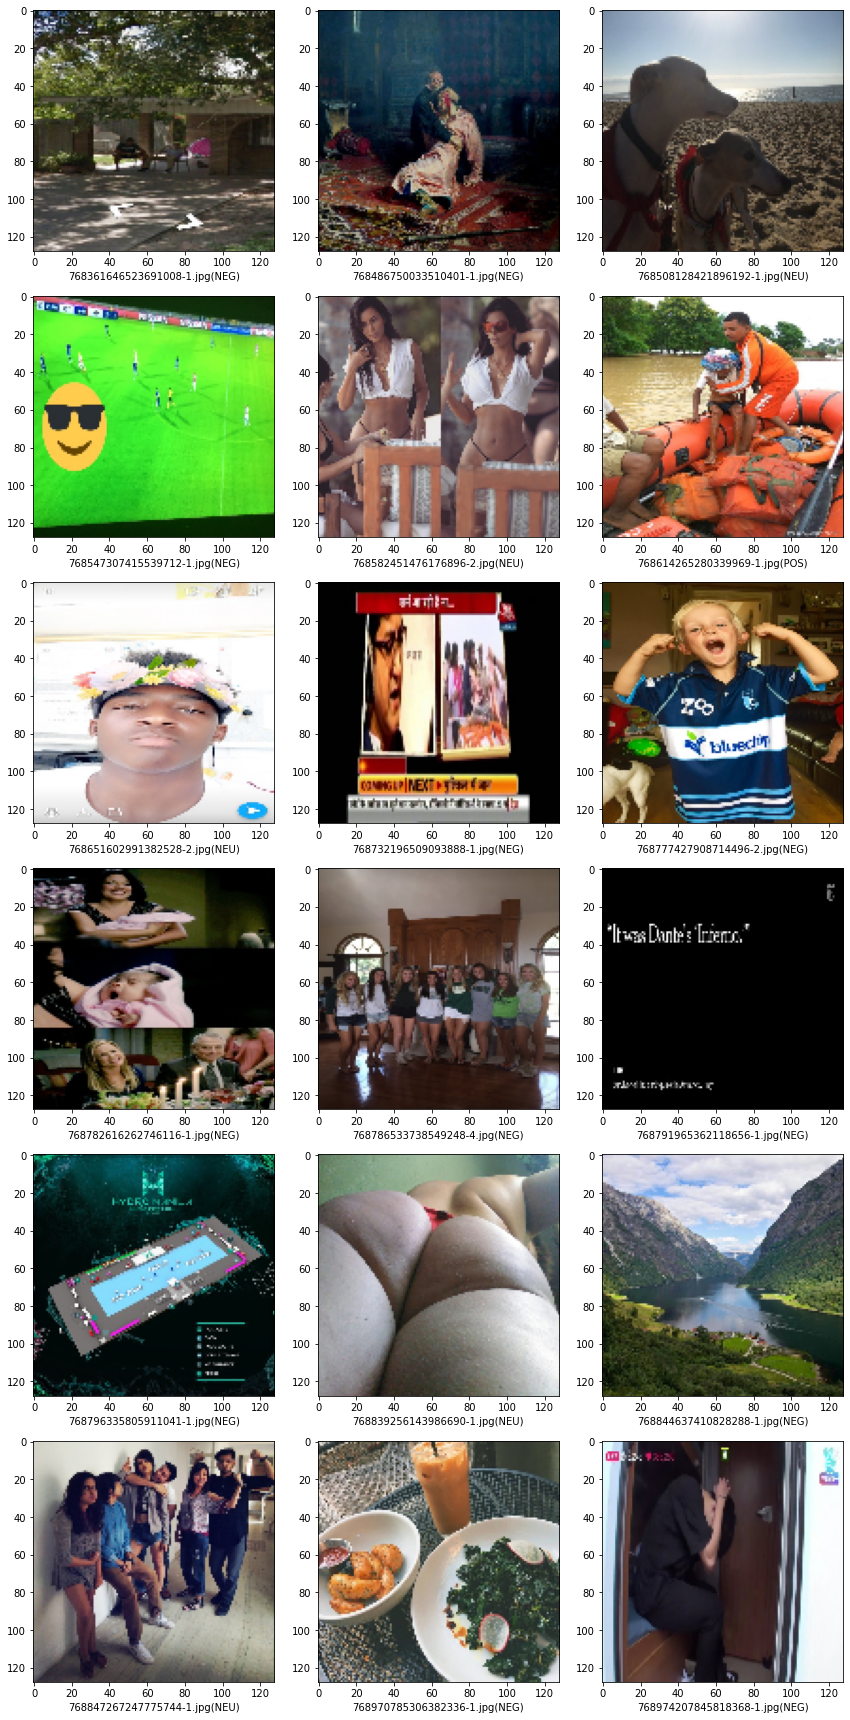

In [101]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("D:\\SiDi\\Project\\Modulo II\\dataset\\512\\test\\"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()